In [ ]:
%load_ext autoreload
%autoreload 2


import sys

sys.path.append("..")


import sys
sys.path.append('..')
from settings import *
from fermiqp.lattice import *
import matplotlib.colors as colors

from fermiqp_style import set_theme
set_theme()
plt.rcParams["lines.marker"] = ""

# Double well tilt v superlattice phase

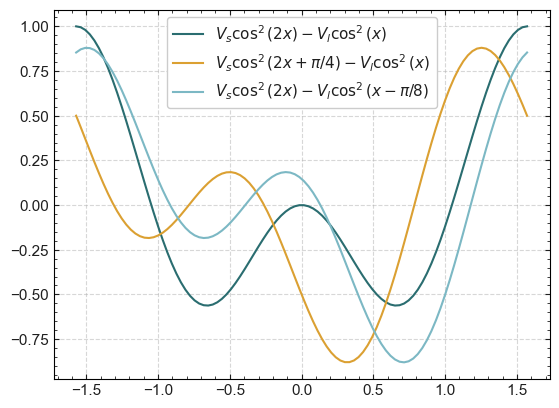

In [2]:
x = np.linspace(-1 / 2, 1 / 2, 100) * np.pi
V_s = 1
ph_s = np.pi / 4

potential = -(np.cos(x) ** 2) + V_s * np.cos(2 * x) ** 2
plt.plot(x, potential, "-", label=r"$V_s\cos^2(2x)-V_l\cos^2(x)$")


potential = -(np.cos(x) ** 2) + V_s * np.cos(2 * x + ph_s) ** 2
plt.plot(x, potential, "-", label=r"$V_s\cos^2(2x+\pi/4)-V_l\cos^2(x)$")

potential = -(np.cos(x - ph_s / 2) ** 2) + V_s * np.cos(2 * x) ** 2
plt.plot(x, potential, "-", label=r"$V_s\cos^2(2x)-V_l\cos^2(x-\pi/8)$")

plt.legend()
plt.grid()

In [3]:
from scipy.signal import argrelextrema

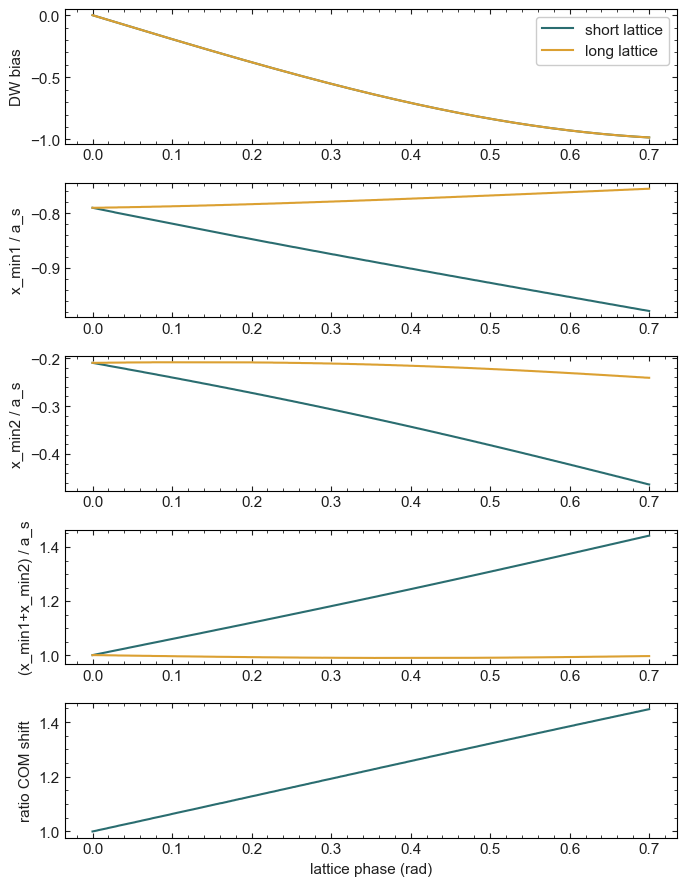

In [ ]:
fig, axs = plt.subplots(5, 1, figsize=(7, 9))

phi_l = 0
V_s = 1
deltas = []
min1 = []
min2 = []
x = np.linspace(-1, 1, 10000) * np.pi

phi_s_array = np.linspace(0, 0.7, 1000)
for phi_s in phi_s_array:
    potential = -(np.cos(x - phi_l) ** 2) + V_s * np.cos(2 * x + 2 * phi_s) ** 2
    minima = argrelextrema(potential, np.less)
    min1.append(x[minima[0][0]])
    min2.append(x[minima[0][1]])
    delta = potential[minima[0][0]] - potential[minima[0][1]]
    deltas.append(delta)

axs[0].plot(phi_s_array, deltas, "-", label="short lattice")
axs[1].plot(phi_s_array, np.array(min1) / np.pi, "-")
axs[2].plot(phi_s_array, np.array(min2) / np.pi, "-")
axs[3].plot(phi_s_array, -(np.array(min1) + np.array(min2)) / np.pi, "-")
com_shift1 = (np.array(min1) + np.array(min2)) / np.pi


deltas = []
phi_l_array = np.linspace(0, 0.7, 1000)
phi_s = 0
min1 = []
min2 = []
for phi_l in phi_l_array:
    potential = -(np.cos(x - phi_l) ** 2) + V_s * np.cos(2 * x + 2 * phi_s) ** 2
    minima = argrelextrema(potential, np.less)
    min1.append(x[minima[0][0]])
    min2.append(x[minima[0][1]])
    delta = potential[minima[0][0]] - potential[minima[0][1]]
    deltas.append(delta)


axs[0].plot(phi_l_array, np.array(deltas), "-", label="long lattice")
axs[1].plot(phi_l_array, np.array(min1) / np.pi, "-")
axs[2].plot(phi_l_array, np.array(min2) / np.pi, "-")
axs[3].plot(phi_l_array, -(np.array(min1) + np.array(min2)) / np.pi, "-")

com_shift2 = (np.array(min1) + np.array(min2)) / np.pi
axs[4].plot(phi_l_array, com_shift1 / com_shift2, "-")


axs[4].set_xlabel("lattice phase (rad)")
axs[0].set_ylabel("DW bias")
axs[0].legend()
axs[1].set_ylabel("x_min1 / a_s")
axs[2].set_ylabel("x_min2 / a_s")
axs[3].set_ylabel(r"(x_min1+x_min2) / a_s")
axs[4].set_ylabel(r"ratio COM shift")


plt.tight_layout()

In [5]:
def gaussian(waist, r):
    return np.exp(-2 * (r / waist) ** 2)

Text(0.5, 1.0, 'harmonic confinement across system')

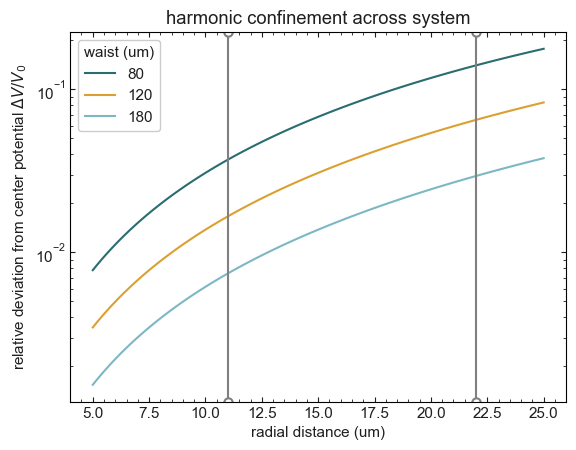

In [6]:
r = np.linspace(5, 25, 100)
waists = [80, 120, 180]
for waist in waists:
    plt.semilogy(r, 1 - gaussian(waist, r), "-", label=waist)
plt.xlabel("radial distance (um)")
plt.ylabel(r"relative deviation from center potential $\Delta V/V_0$")
plt.legend(title="waist (um)")

plt.axvline(10 * 1.1, c="gray")
plt.axvline(20 * 1.1, c="gray")

plt.title("harmonic confinement across system")

# Gaussian Beams

In [ ]:
sEr = 1562.618
lEr = 6250.474

Vs = 25
Vl = 25

phi_l = 0  # pi / 8
phi_s = pi / 2

ashort = 1.1e-6
along = dw_spacing = ashort * 2

In [ ]:
def angle_to_vec(theta: float, phi: float = 90) -> np.ndarray:
    """
    returns a unitary vector with the specified angle wrt x-axis
    theta:  in deg, polar angle
    phi:    in deg, azimuthal
    """
    [theta, phi] = np.deg2rad([theta, phi])

    vec = np.array(
        [
            np.cos(theta) * np.sin(phi),
            np.sin(theta) * np.sin(phi),
            np.cos(phi),
        ]
    )
    return vec / np.linalg.norm(vec)

In [13]:
green_waist = 200e-6
ir_waist = green_waist

prop_dir1 = angle_to_vec(0, 14)
prop_dir2 = angle_to_vec(0, -14)

gr = GaussianBeam3D(
    waist=green_waist,
    wavelen=532e-9,
    prop_dir=prop_dir1,
    depth=Vs,
    phi=phi_s,
)
gr2 = GaussianBeam3D(
    waist=green_waist,
    wavelen=532e-9,
    prop_dir=prop_dir2,
    depth=Vs,
    phi=phi_s,
)
ir = GaussianBeam3D(
    waist=green_waist,
    wavelen=1064e-9,
    prop_dir=prop_dir1,
    depth=Vl,
    phi=phi_l,
)
ir2 = GaussianBeam3D(
    waist=green_waist,
    wavelen=1064e-9,
    prop_dir=prop_dir2,
    depth=Vl,
    phi=phi_l,
)

beams = [gr, gr2, ir, ir2]
green_beams = [
    gr,
    gr2,
]
ir_beams = [ir, ir2]

green_latt = InterferingBeams(green_beams)
ir_latt = InterferingBeams(ir_beams)


# latt = InterferingBeams(beams)

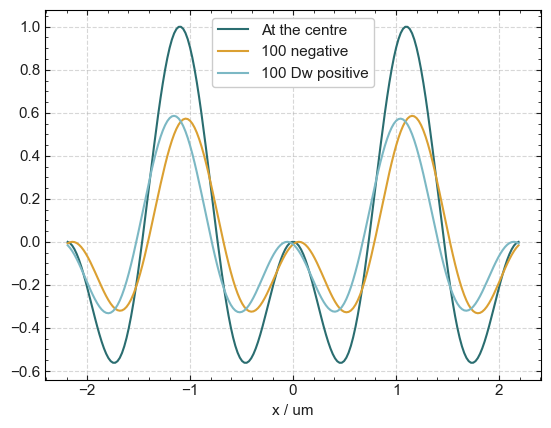

In [14]:
# x = np.linspace(-200e-6, 200e-6, 501)
n_dw = 100
system_size = n_dw * along

x = np.linspace(-system_size / 2, system_size / 2, n_dw * 100)
# x = np.arange(-system_size/2, system_size/2, 0.02e-6)

y = np.linspace(-20e-6, 2e-6, 501)
X, Y = np.meshgrid(x, 0)
pos = [X, Y, 0]


i_ir = ir_latt.getIntensity(pos)
i_gr = green_latt.getIntensity(pos)

i = i_gr / i_gr.max() - i_ir / i_ir.max()
# beam.getIntensity(pos)
# i = latt.getIntensity([X, Y, 0])
# i = -i / i.max()

idx_centre = x.shape[0] // 2
# idx_central_dw = np.indices([idx_centre-100:idx_centre+200])

plt.plot(
    x[x.shape[0] // 2 - 100 : x.shape[0] // 2 + 100] / 1e-6,
    i[0][x.shape[0] // 2 - 100 : x.shape[0] // 2 + 100],
    marker="",
    label="At the centre",
)
plt.plot(
    x[x.shape[0] // 2 - 100 : x.shape[0] // 2 + 100] / 1e-6,
    i[0][0:200],
    marker="",
    label=f"{n_dw} negative",
)
plt.plot(
    x[x.shape[0] // 2 - 100 : x.shape[0] // 2 + 100] / 1e-6,
    i[0][-200:],
    marker="",
    label=f"{n_dw} Dw positive",
)
plt.xlabel("x / um")
plt.legend()
plt.grid()

In [ ]:
def createLattice(Vs, Vl, green_waist, ir_waist, phi_s, phi_l):
    prop_dir1 = angle_to_vec(0, 14)
    prop_dir2 = angle_to_vec(0, -14)

    gr = GaussianBeam3D(
        waist=green_waist,
        wavelen=532e-9,
        prop_dir=prop_dir1,
        depth=Vs,
        phi=phi_s,
    )
    gr2 = GaussianBeam3D(
        waist=green_waist,
        wavelen=532e-9,
        prop_dir=prop_dir2,
        depth=Vs,
        phi=phi_s,
    )
    ir = GaussianBeam3D(
        waist=ir_waist,
        wavelen=1064e-9,
        prop_dir=prop_dir1,
        depth=Vl,
        phi=phi_l,
    )
    ir2 = GaussianBeam3D(
        waist=ir_waist,
        wavelen=1064e-9,
        prop_dir=prop_dir2,
        depth=Vl,
        phi=phi_l,
    )

    # beams = [gr, gr2, ir, ir2]
    green_beams = [gr, gr2]
    ir_beams = [ir, ir2]

    green_latt = InterferingBeams(green_beams)
    ir_latt = InterferingBeams(ir_beams)

    return green_latt, ir_latt

0.0
0.3490658503988659
0.6981317007977318
1.0471975511965976
1.3962634015954636
1.7453292519943295
2.0943951023931953
2.443460952792061
2.792526803190927
3.141592653589793


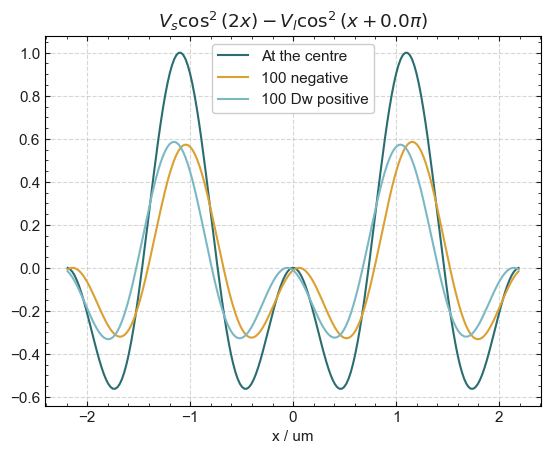

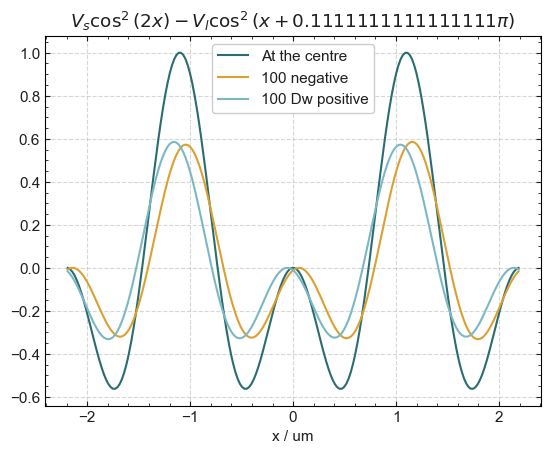

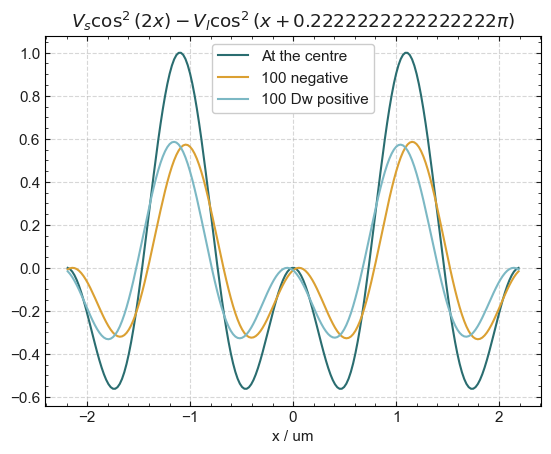

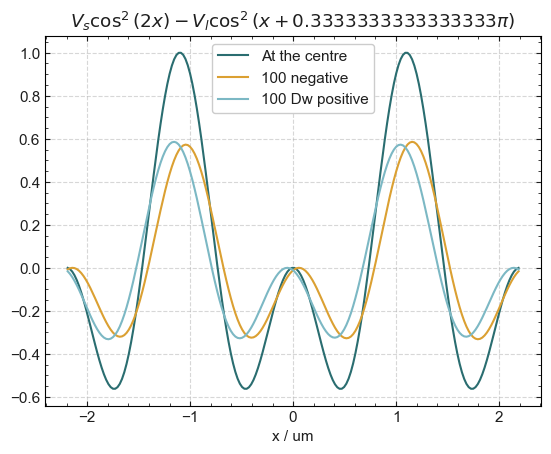

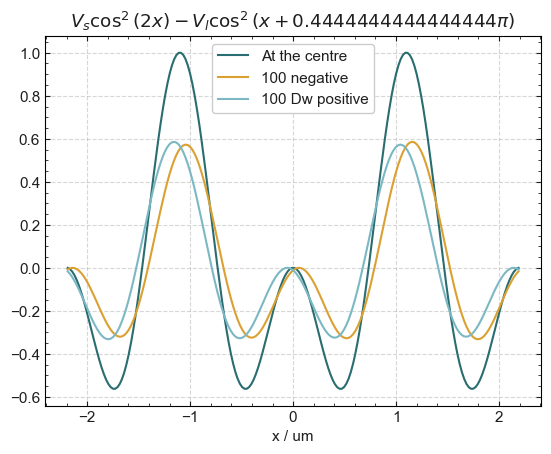

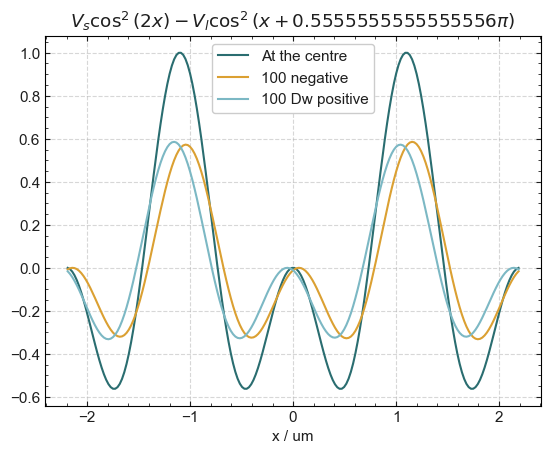

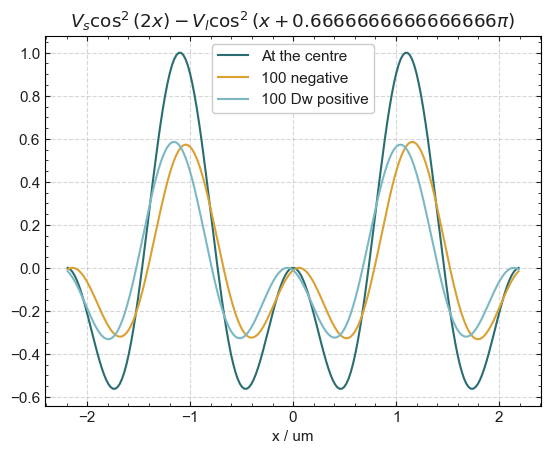

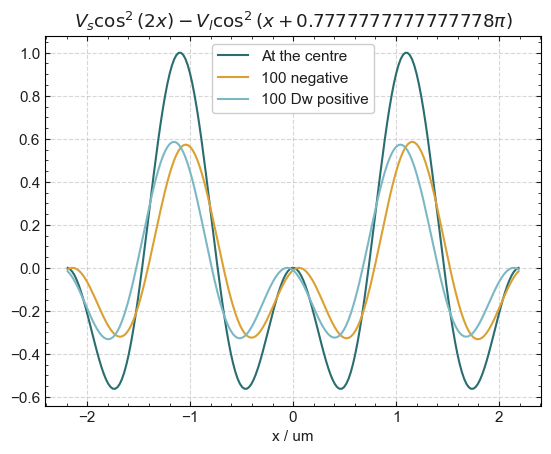

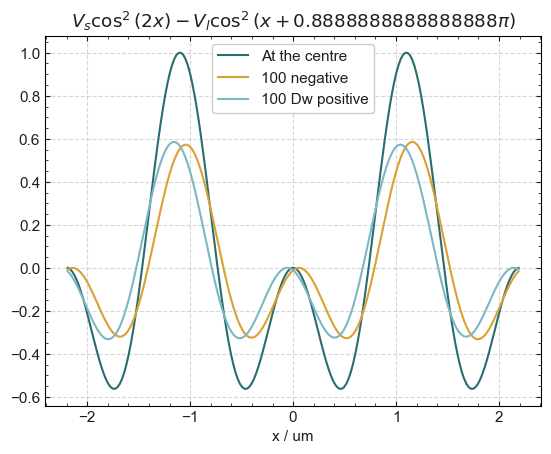

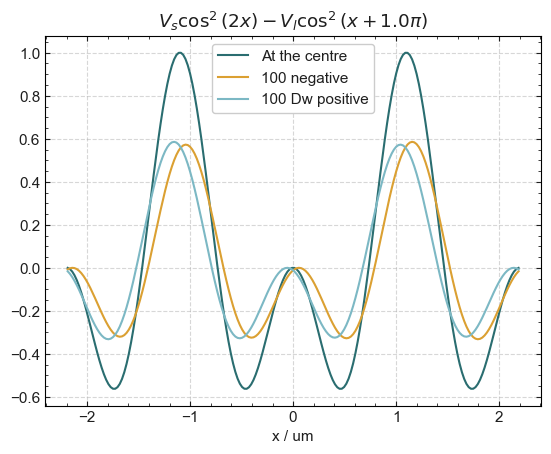

<Figure size 640x480 with 0 Axes>

In [ ]:
Vs = 25
Vl = 25
green_waist = 200e-6
ir_waist = green_waist

phi_l = pi / 8
phi_s = 0

ashort = 1.1e-6
along = dw_spacing = ashort * 2


n_dw = 100
system_size = n_dw * along

x = np.linspace(-system_size / 2, system_size / 2, n_dw * 100)
# y = np.linspace(-20e-6, 2e-6, 501)
X, Y = np.meshgrid(x, 0)
pos = [X, Y, 0]


for phi_long in np.linspace(0, np.pi, 10):
    print(phi_long)
    green_latt, ir_latt = createLattice(
        Vs=Vs,
        Vl=Vl,
        green_waist=green_waist,
        ir_waist=ir_waist,
        phi_l=phi_long,
        phi_s=phi_s,
    )

    i_ir = ir_latt.getIntensity(pos)
    i_gr = green_latt.getIntensity(pos)

    i = i_gr / i_gr.max() - i_ir / i_ir.max()

    plt.plot(
        x[x.shape[0] // 2 - 100 : x.shape[0] // 2 + 100] / 1e-6,
        i[0][x.shape[0] // 2 - 100 : x.shape[0] // 2 + 100],
        marker="",
        label="At the centre",
    )
    plt.plot(
        x[x.shape[0] // 2 - 100 : x.shape[0] // 2 + 100] / 1e-6,
        i[0][0:200],
        marker="",
        label=f"{n_dw} negative",
    )
    plt.plot(
        x[x.shape[0] // 2 - 100 : x.shape[0] // 2 + 100] / 1e-6,
        i[0][-200:],
        marker="",
        label=f"{n_dw} Dw positive",
    )
    plt.xlabel("x / um")
    plt.legend()
    plt.title(rf"$V_s\cos^2(2x)-V_l\cos^2(x+{phi_long/pi} \pi)$")
    plt.grid()

    plt.figure()

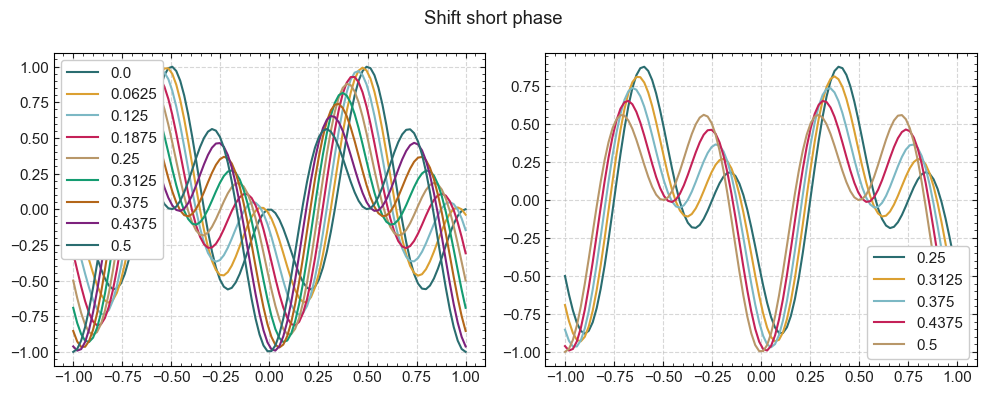

In [184]:
Vl = Vs = 1
x = np.linspace(-pi, pi, 100)


def potential(phis=0, phil=0, Vl=1, Vs=1):
    return Vs * np.cos(2 * x + phis) ** 2 - Vl * np.cos(x + phil) ** 2


plt.subplot(121)
plt.subplot(121)
for phi in np.linspace(0, 0.5, 9, endpoint=True) * pi:
    plt.plot(x / pi, potential(phis=phi), label=phi / pi)
plt.legend()
plt.grid()

plt.subplot(122)
for phi in np.arange(pi / 4, 2 * pi / 4 + 1e-6, pi / 16):
    plt.plot(x / pi, potential(phis=phi), label=phi / pi)
plt.legend()
plt.grid()

plt.suptitle("Shift short phase")
plt.gcf().set_size_inches(10, 4)
plt.tight_layout()

# plt.plot(x / pi, potential(phis=0))
# plt.plot(x / pi, potential(phis=pi / 4))
# plt.plot(x / pi, potential(phis=3*pi / 4))
# plt.plot(x / pi, potential(phis=pi / 2))
# plt.plot(x / pi, potential(phis=3 * pi / 4))
# plt.plot(x / pi, potential(phis=4 * pi / 8))
# plt.plot(x / pi, potential(phis=pi), linestyle="--")

<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:13: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:13: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\D'
C:\Users\janet\AppData\Local\Temp\ipykernel_31956\3591386344.py:7: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(x / pi, potential(phil=phi), label=f"{phi /pi:.3} $\pi$")
C:\Users\janet\AppData\Local\Temp\ipykernel_31956\3591386344.py:13: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(x / pi, potential(phil=phi), label=f"{phi / pi:.3} $\pi$")
C:\Users\janet\AppData\Local\Temp\ipykernel_31956\3591386344.py:20: SyntaxWarning: invalid escape sequence '\D'
  plt.gcf().suptitle("$\Delta \\varphi_l$")


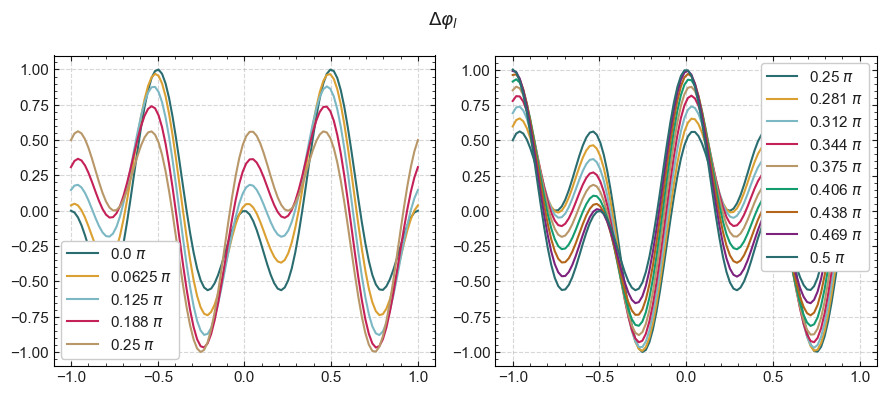

In [172]:
Vl = Vs = 1
x = np.linspace(-pi, pi, 100)


plt.subplot(121)
for phi in np.linspace(0, 1 / 4, 5, endpoint=True) * pi:
    plt.plot(x / pi, potential(phil=phi), label=f"{phi /pi:.3} $\pi$")
plt.legend()
plt.grid()

plt.subplot(122)
for phi in np.linspace(1 / 4, 1 / 2, 9, endpoint=True) * pi:
    plt.plot(x / pi, potential(phil=phi), label=f"{phi / pi:.3} $\pi$")
plt.legend()
plt.grid()


plt.gcf().set_size_inches(9, 4)
plt.gcf().suptitle("$\Delta \\varphi_l$")
plt.tight_layout()


<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
C:\Users\janet\AppData\Local\Temp\ipykernel_31956\2767106863.py:2: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(x / pi, potential(phis=2*phi, phil=phi), label=f"$\\varphi_s$ = {phi / pi} $\pi$")


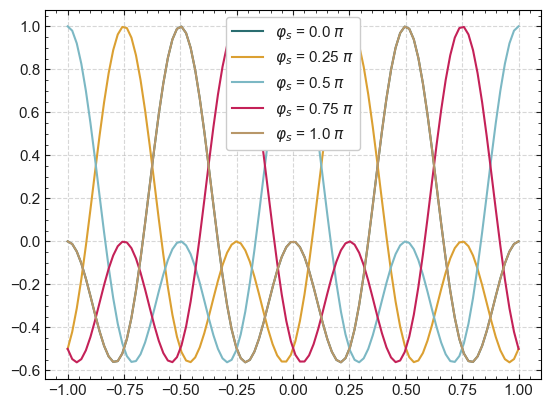

In [ ]:
for phi in np.linspace(0, 1, 5, endpoint=True) * pi:
    plt.plot(
        x / pi,
        potential(phis=2 * phi, phil=phi),
        label=f"$\\varphi_s$ = {phi / pi} $\\pi$",
    )
plt.legend()
plt.grid()
